#**Sentimental Analysis on Resturant Reveiw**




About the Data

*   **Data overview**: This is a 'Sentiment Analysis Of Restaurent Reviews'.tsv data



#Import the Required libraries

In [1]:
# connecting the drive with google colab

from google.colab import drive
drive.mount("/content.drive/")

Drive already mounted at /content.drive/; to attempt to forcibly remount, call drive.mount("/content.drive/", force_remount=True).


In [2]:
# importing essential libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the dataset
data=pd.read_csv('/content.drive/MyDrive/Colab Notebooks/sentimental analysis on restaurant/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [4]:
# shape=tuple of array dimension(row,column)
data.shape

(1000, 2)

In [5]:
# returns the label of each column
data.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
# view the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
# information about the data frames
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# Data Preprocessing

In [8]:
# importing essential libraries for performing Natural Language Processing on
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Cleaning the reviews
corpus=[]
for i in range(0,1000):  #1000 records

  # Cleaning special character from the reviews
  #The re.sub() method performs global search replace on th given string
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words =[word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpse
  corpus.append(review)

In [10]:
corpus[:100]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [11]:
#creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
countvector = CountVectorizer(max_features=1500)
X = countvector.fit_transform(corpus).toarray()
Y = data.iloc[:,1].values

#Split Data - (1000,1500)



*   In this step,we are going to split data into two parts(training and testing),so that we can train our model on training dataset and test its accuracy on unseen test data.


In [12]:
from sklearn.model_selection import train_test_split  #use to split the original data into training data & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123)

#training (1000,1500)
# 1000*80/100 = 800
# 1000*20/100 = 200

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

#Model Training

*   As we have done with preprocessing part,it is time to train our model. I am going to train model.
*   List item



In [14]:
#Fitting XGboost to the training set

from sklearn.naive_bayes import MultinomialNB
clsfer = MultinomialNB()
clsfer.fit(X_train, Y_train)


MultinomialNB()

In [15]:
# Predicting the test set reselts

Y_pred = clsfer.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1])

In [16]:
#Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(Y_test,Y_pred)
score2 = precision_score(Y_test,Y_pred)
score3 = recall_score(Y_test,Y_pred)

print("----Scores----")

print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

----Scores----
Accuracy score is: 78.5%
Precision score is: 75.83%
Recall score is: 86.67%


In [17]:
# Making the Confusion Matrix
# A confusion matrix is a table that is used to define the performance of a classification algorithms.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

In [18]:
cm

array([[66, 29],
       [14, 91]])

Text(95.72222222222221, 0.5, 'Actual values')

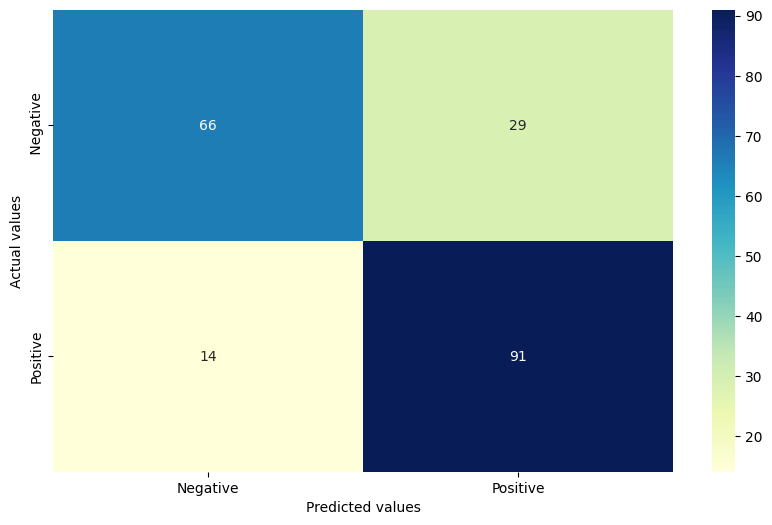

In [19]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt   #Matplotlib is a low level graph plotting library python that serves as a visualization utility
import seaborn as sns             #Seaborn Is a Python data visualization library based on matplotlib

%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=([' Negative', 'Positive']))
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [20]:
#Hyperparameter tuning the Naive Bayes Classifier

best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_clsfer = MultinomialNB (alpha=i)
  temp_clsfer.fit(X_train, Y_train)
  temp_y_pred = temp_clsfer.predict(X_test)
  accuracy = accuracy_score(Y_test, temp_y_pred)
  print("Accuracy score for alpha-{} is: {}%".format(round (i,1), round(accuracy*100,2)))
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    alpha_value = i

print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round (best_accuracy*100, 2), round(alpha_value,1)))

Accuracy score for alpha-0.1 is: 77.5%
Accuracy score for alpha-0.2 is: 76.5%
Accuracy score for alpha-0.3 is: 78.0%
Accuracy score for alpha-0.4 is: 77.5%
Accuracy score for alpha-0.5 is: 77.0%
Accuracy score for alpha-0.6 is: 77.0%
Accuracy score for alpha-0.7 is: 77.5%
Accuracy score for alpha-0.8 is: 77.5%
Accuracy score for alpha-0.9 is: 78.5%
Accuracy score for alpha-1.0 is: 78.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.9


In [21]:
clsfer = MultinomialNB(alpha=0.2)
clsfer.fit(X_train, Y_train)

MultinomialNB(alpha=0.2)

#Predictions

In [22]:
def predict_sentiment (sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = countvector.transform([final_review]).toarray()
  return clsfer.predict(temp)

In [23]:
result = ['Not satisfying! Negetive Review','Good! Positive Review']

In [24]:
#Predicting values

sample = 'The food smells good and taste was delicious.'

if predict_sentiment(sample):
  print(result[1])
else:
  print(result[0])

Good! Positive Review


In [25]:
#Predicting values

sample = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample):
  print(result[1])
else:
  print(result[0])

Not satisfying! Negetive Review


In [26]:
#Predicting values

sample = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample):
  print(result[1])
else:
  print(result[0])

Good! Positive Review
